In [134]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from warnings import filterwarnings

In [135]:
Ti=pd.DataFrame
Ti = pd.read_csv('C:/Users/upash/Downloads/tested.csv')
Ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [136]:
Ti.tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [137]:
Ti.shape

(418, 12)

In [138]:
Ti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [139]:

Ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [170]:
Ti['Age'].fillna(Ti['Age'].mean(),inplace=True)
Ti['Fare'].fillna(Ti['Fare'].mean(),inplace=True)
Ti['Embarked'].fillna(Ti['Embarked'].mode()[0],inplace=True)

In [171]:

Ti.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418.000000,418.000000,418.000000,418.000000,418,418.000000,91,418.000000
unique,NaN,NaN,NaN,418,NaN,NaN,NaN,NaN,363,NaN,76,NaN
top,NaN,NaN,NaN,"Kelly, Mr. James",NaN,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,5,NaN,3,NaN
mean,1100.500000,0.363636,2.265550,NaN,0.363636,30.272590,0.447368,0.392344,NaN,35.627188,NaN,1.401914
std,120.810458,0.481622,0.841838,NaN,0.481622,12.634534,0.896760,0.981429,NaN,55.840500,NaN,0.854496
min,892.000000,0.000000,1.000000,NaN,0.000000,0.170000,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,996.250000,0.000000,1.000000,NaN,0.000000,23.000000,0.000000,0.000000,NaN,7.895800,NaN,1.000000
50%,1100.500000,0.000000,3.000000,NaN,0.000000,30.272590,0.000000,0.000000,NaN,14.454200,NaN,2.000000
75%,1204.750000,1.000000,3.000000,NaN,1.000000,35.750000,1.000000,0.000000,NaN,31.500000,NaN,2.000000


In [142]:
Ti.groupby('Survived').mean()

C:\Users\upash\AppData\Local\Temp\ipykernel_19112\1827918297.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Ti.groupby('Survived').mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,1102.620301,2.334586,30.272699,0.379699,0.274436,27.558326
1,1096.789474,2.144737,30.272400,0.565789,0.598684,49.747699


In [143]:
Ti['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

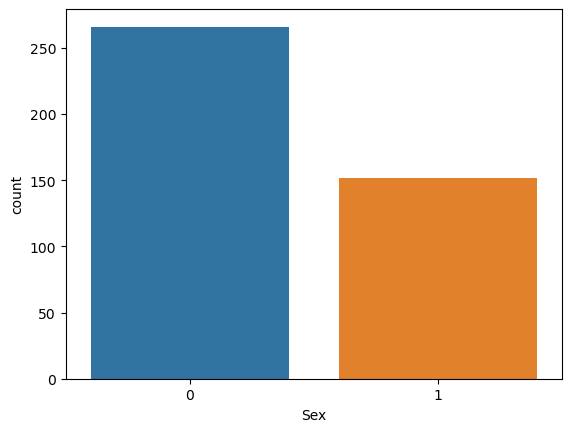

In [172]:
sns.countplot(x='Sex',data=Ti)

In [145]:
Ti.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [146]:
alive = len(Ti[Ti['Survived'] == 1])
dead = len(Ti[Ti['Survived'] == 0])

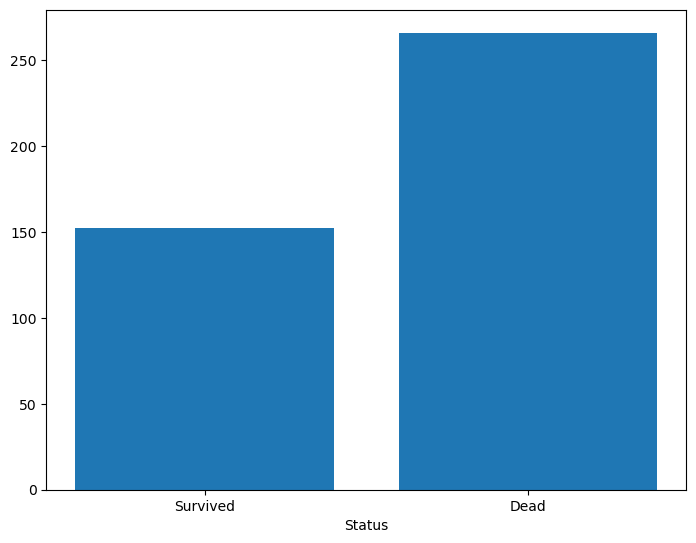

In [147]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

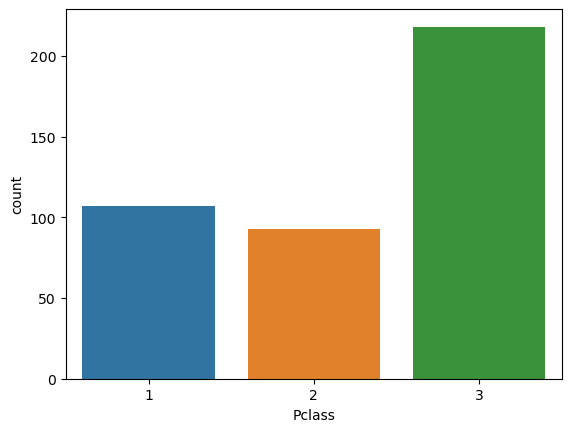

In [148]:
sns.countplot(x='Pclass', data=Ti)

<Axes: xlabel='Pclass', ylabel='count'>

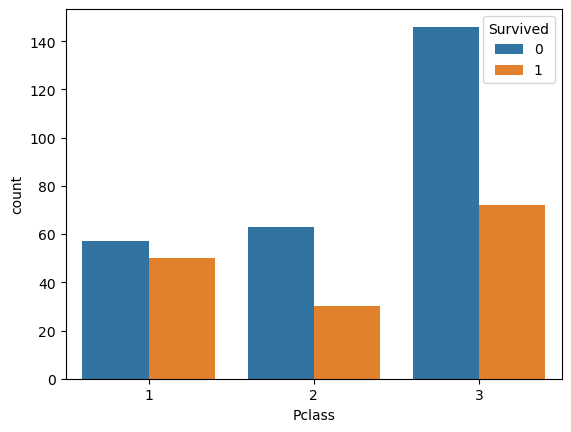

In [149]:
sns.countplot(x='Pclass', hue='Survived',data=Ti)

<Axes: xlabel='SibSp', ylabel='count'>

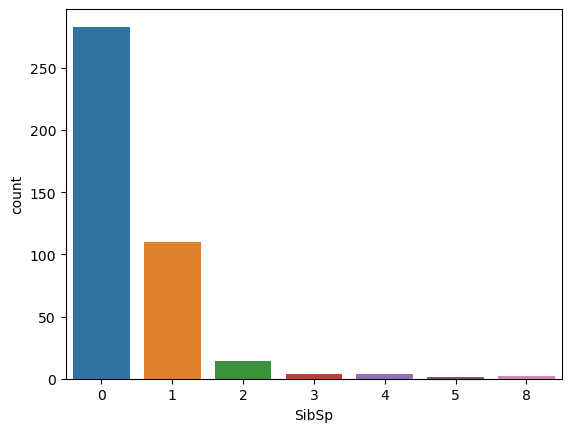

In [150]:
sns.countplot(x='SibSp', data=Ti)

In [151]:
Ti['Age'].isnull().sum()

0

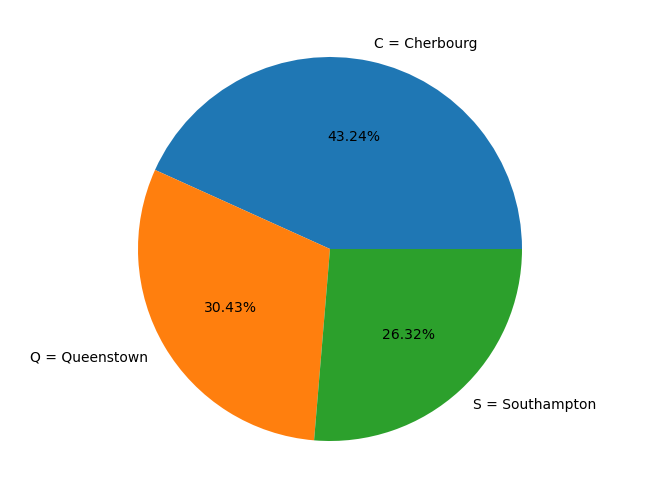

In [152]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [153]:
Ti.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [154]:
Ti.replace({'Embarked':{'C':0, 'Q':1 ,'S':2}},inplace=True)

In [155]:
X=Ti.drop(columns=['PassengerId','Name','Ticket','Survived','Cabin'],axis=1)
Y=Ti['Survived']

In [156]:

print(X)


     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         1
1         3    1  47.00000      1      0    7.0000         2
2         2    0  62.00000      0      0    9.6875         1
3         3    0  27.00000      0      0    8.6625         2
4         3    1  22.00000      1      1   12.2875         2
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         2
414       1    1  39.00000      0      0  108.9000         0
415       3    0  38.50000      0      0    7.2500         2
416       3    0  30.27259      0      0    8.0500         2
417       3    0  30.27259      1      1   22.3583         0

[418 rows x 7 columns]


In [157]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [158]:
#Training and Testing

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [159]:
print(X.shape)

(418, 7)


In [160]:
model=LogisticRegression()

In [166]:
X_train_prediction=model.predict(X_train)

In [167]:
model.fit(X_train,Y_train)

LogisticRegression()

In [169]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("Accuracy Score:",training_data_accuracy)

Accuracy Score: 1.0
